In [2]:

model_tag="Oct20_TeVPA_HP"

save_dir = f"/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.12/20904/{model_tag}/save_dir/"
args_template = "info.model_name={model_name} model.parameters.event_branch_layers={event_branch_layers} model.parameters.muon_branch_layers={muon_branch_layers} model.parameters.muon_embedding_dim={muon_embedding_dim} model.parameters.combination_layers={combination_layers} training.epochs={epochs}"
args_template = f"{args_template} info.save_dir={save_dir} hydra.output_subdir=null"

command_template = f"python /cephfs/users/nrad/work/i3rej/run.py {args_template}"


import itertools 


base_layers = [64, 128, 256, 512]

layers_comb = list(itertools.product(base_layers, repeat=1)) + list(itertools.product(base_layers, repeat=2)) + list(itertools.product(base_layers, repeat=3))
combination_map = {str(x):x for x in layers_comb}
comb_keys = list(combination_map.keys())
muon_embedding_dims = [2,8, 16, 32, 64, 128, 256]

event_branch_layers_choices = [(64,), (64, 64), (256,256), (512,), (512, 512)]
muon_branch_layers_choices = [ (256,), (64,),  (64, 64), (64, 128), (128, 128), (256, 256) ]
combination_layers_choices = [(64,), (128,), (256,), (512,), (1028,), (64, 256,256), (128, 512, 512), (64, 64, 128)]


def make_string_list(layers):
    return "'[{}]'".format(",".join([str(x) for x in layers]))

commands = []
for event_branch_layers in event_branch_layers_choices:
    etag = "E{}".format("_".join([str(x) for x in event_branch_layers]))
    for muon_branch_layers in muon_branch_layers_choices :
        mtag = "M{}".format("_".join([str(x) for x in muon_branch_layers]))
        for combination_layers in combination_layers_choices:
        # for combination_layers in [(64,), ]:
            ctag = "C{}".format("_".join([str(x) for x in combination_layers]))
            for muon_embedding_dim in muon_embedding_dims:
                embtag = f"D{muon_embedding_dim}"
                model_name = f"{embtag}_{mtag}_{etag}_{ctag}"
                command = command_template.format(model_name=model_name, 
                                                    event_branch_layers=make_string_list(event_branch_layers),  
                                                    muon_branch_layers=make_string_list(muon_branch_layers),
                                                    combination_layers=make_string_list(combination_layers),
                                                    muon_embedding_dim=muon_embedding_dim, 
                                                    epochs=50)
                # command = command_template.format(model_tag=model_tag, 
                #                                     model_name=model_name,
                #                                     event_branch_layers=" ".join([str(x) for x in event_branch_layers]), 
                #                                     muon_branch_layers=" ".join([str(x) for x in muon_branch_layers]),
                #                                     combination_layers=" ".join(str(x) for x in combination_layers),
                #                                     muon_embedding_dim=muon_embedding_dim, 
                #                                     n_epoch=50)
                commands.append(command)
                #print(model_name)

print(len(commands))


job_file = f"/cephfs/users/nrad/work/i3rej/manual_hp/{model_tag}.txt"
print("\n".join(commands), file=open(job_file, "w") )
print(f'jobs written to:\n{job_file}')

1680
jobs written to:
/cephfs/users/nrad/work/i3rej/manual_hp/Oct20_TeVPA_HP.txt


In [21]:
print(commands[0])

python /cephfs/users/nrad/work/i3rej/run.py info.model_name=D2_M256_E64_C64 model.parameters.event_branch_layers='[64]' model.parameters.muon_branch_layers='[256]' model.parameters.muon_embedding_dim=2 model.parameters.combination_layers='[64]' training.epochs=50 info.save_dir=/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.12/20904/Oct20_TeVPA_HP/save_dir/ hydra.output_subdir=null


In [ ]:
python run.py info.model_name=D2_M256_E64_C64 model.parameters.event_branch_layers='[64]' model.parameters.muon_branch_layers='[256]' model.parameters.muon_embedding_dim=2 model.parameters.combination_layers='[64]' training.epochs=50 info.save_dir=/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.12/20904/Oct20_TeVPA_HP/save_dir/ hydra.output_dir=null

python run.py info.model_name=D256_M256_256_E512_512_C64_64_128 model.parameters.event_branch_layers='[512,512]' model.parameters.muon_branch_layers='[256,256]' model.parameters.muon_embedding_dim=256 model.parameters.combination_layers='[64,64,128]' training.epochs=50 info.save_dir=/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.12/20904/Oct20_TeVPA_HP/save_dir/


In [3]:
import glob
import os
import pickle

# save_dir = "/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.12/20904/Oct20_TeVPA_HP_10epochs/save_dir"

model_dirs = glob.glob(f"{save_dir}/*/")
# model_names = [os.path.basename(model.rstrip("/")) for model in models]
print("found {} models".format(len(model_dirs)))
results = {}
for model_dir in model_dirs:
    model_name = os.path.basename(model_dir.rstrip("/"))
    # print(model_name)
    speedup_res_path = f"{model_dir}/speedup.pkl"
    if not os.path.exists(speedup_res_path):
        continue
    speedup_res = pickle.load(open(speedup_res_path, "rb"))
    results[model_name] = speedup_res[model_name]['speed_normed']
    
print(f"found {len(results)} models with speedup results")

found 1680 models
found 1678 models with speedup results


[('D128_M128_128_E64_64_C128_512_512', np.float64(2.128948075716299)),
 ('D8_M128_128_E512_C256', np.float64(2.1173216624012046)),
 ('D8_M128_128_E64_64_C1028', np.float64(2.1936812019247354)),
 ('D8_M128_128_E64_C64', np.float64(2.1089069422368416)),
 ('D16_M128_128_E64_64_C64_256_256', np.float64(2.084695150668596)),
 ('D32_M128_128_E64_64_C128_512_512', np.float64(2.06114587119124)),
 ('D16_M64_64_E64_64_C256', np.float64(2.057059747604166)),
 ('D8_M128_128_E512_C128', np.float64(2.048207828330218)),
 ('D8_M64_128_E64_64_C128', np.float64(2.0705249276894655)),
 ('D256_M128_128_E64_64_C64_64_128', np.float64(2.0319137011999984))]

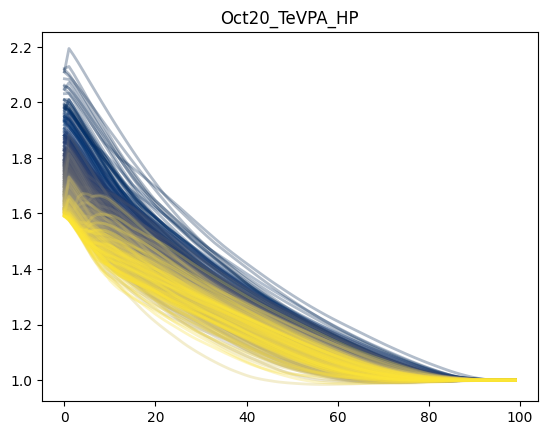

In [6]:

import matplotlib.pyplot as plt
import numpy as np



good_speedups = [(k,v) for k,v in results.items() if np.max(v) > 1.1]
good_speedups = sorted(good_speedups, key=lambda x: x[1][0] , reverse=True)
good_speedups = good_speedups[:500]
cmap = plt.get_cmap('cividis')

colors = cmap(np.linspace(0, 1, len(good_speedups)))


imodel = 0
for model_name, speedup in good_speedups:
    plt.plot(speedup, label=model_name, color=colors[imodel], alpha=0.3, lw=2 )
    imodel += 1
    
plt.title(f'{model_tag}')
[ (k[0], np.max(k[1]) ) for k in good_speedups[:10]]




In [33]:
import keras
import pandas as pd
model_dirs

# df = pd.read_hdf("/cephfs/users/nrad/lustre/data/hdf/Cscd_v0.0.12/20904/test_train_nocombineskimmed_nphotons/test.hdf5")
df = pd.read_parquet("/cephfs/users/nrad/lustre/data/hdf/Cscd_v0.0.12/20904/test_train_nocombineskimmed_nphotons/test.parquet", engine='fastparquet')

import speedup_utils
import custom_model

features = ['log_z', 'log_rho', 'log_length', 'log_energy', 'interaction_height', 'cos_zenith', 'pdg_map', 'log_energy_per_nucleon', 'depth', 'multiplicity', 'mu_radius_mean', 'mu_radius_std', 'mu_radius_min', 'mu_radius_max', 'mu_log_energy_mean', 'mu_log_energy_std', 'mu_log_energy_min', 'mu_log_energy_max', 'mu1_radius', 'mu2_radius', 'mu3_radius', 'mu4_radius', 'mu5_radius', 'mu6_radius', 'mu7_radius', 'mu8_radius', 'mu9_radius', 'mu10_radius', 'mu1_log_energy', 'mu2_log_energy', 'mu3_log_energy', 'mu4_log_energy', 'mu5_log_energy', 'mu6_log_energy', 'mu7_log_energy', 'mu8_log_energy', 'mu9_log_energy', 'mu10_log_energy', 'singleness', 'mu_leading_energy_fraction', 'mu_bundle_log_energy', 'mu1_pos_x', 'mu1_pos_y', 'mu1_pos_z', 'mu1_dir_x', 'mu1_dir_y', 'mu1_dir_z', 'mu2_pos_x', 'mu2_pos_y', 'mu2_pos_z', 'mu2_dir_x', 'mu2_dir_y', 'mu2_dir_z', 'mu3_pos_x', 'mu3_pos_y', 'mu3_pos_z', 'mu3_dir_x', 'mu3_dir_y', 'mu3_dir_z', 'mu4_pos_x', 'mu4_pos_y', 'mu4_pos_z', 'mu4_dir_x', 'mu4_dir_y', 'mu4_dir_z', 'mu5_pos_x', 'mu5_pos_y', 'mu5_pos_z', 'mu5_dir_x', 'mu5_dir_y', 'mu5_dir_z', 'mu6_pos_x', 'mu6_pos_y', 'mu6_pos_z', 'mu6_dir_x', 'mu6_dir_y', 'mu6_dir_z', 'mu7_pos_x', 'mu7_pos_y', 'mu7_pos_z', 'mu7_dir_x', 'mu7_dir_y', 'mu7_dir_z', 'mu8_pos_x', 'mu8_pos_y', 'mu8_pos_z', 'mu8_dir_x', 'mu8_dir_y', 'mu8_dir_z', 'mu9_pos_x', 'mu9_pos_y', 'mu9_pos_z', 'mu9_dir_x', 'mu9_dir_y', 'mu9_dir_z', 'mu10_pos_x', 'mu10_pos_y', 'mu10_pos_z', 'mu10_dir_x', 'mu10_dir_y', 'mu10_dir_z']
labels = ['CscdBDT']
X, y, sample_weight = custom_model.xy_maker_muon_embedding(df, features, labels)

muon 1: ['mu1_pos_x', 'mu1_pos_y', 'mu1_pos_z', 'mu1_dir_x', 'mu1_dir_y', 'mu1_dir_z', 'mu1_radius', 'mu1_log_energy']
muon 2: ['mu2_pos_x', 'mu2_pos_y', 'mu2_pos_z', 'mu2_dir_x', 'mu2_dir_y', 'mu2_dir_z', 'mu2_radius', 'mu2_log_energy']
muon 3: ['mu3_pos_x', 'mu3_pos_y', 'mu3_pos_z', 'mu3_dir_x', 'mu3_dir_y', 'mu3_dir_z', 'mu3_radius', 'mu3_log_energy']
muon 4: ['mu4_pos_x', 'mu4_pos_y', 'mu4_pos_z', 'mu4_dir_x', 'mu4_dir_y', 'mu4_dir_z', 'mu4_radius', 'mu4_log_energy']
muon 5: ['mu5_pos_x', 'mu5_pos_y', 'mu5_pos_z', 'mu5_dir_x', 'mu5_dir_y', 'mu5_dir_z', 'mu5_radius', 'mu5_log_energy']
muon 6: ['mu6_pos_x', 'mu6_pos_y', 'mu6_pos_z', 'mu6_dir_x', 'mu6_dir_y', 'mu6_dir_z', 'mu6_radius', 'mu6_log_energy']
muon 7: ['mu7_pos_x', 'mu7_pos_y', 'mu7_pos_z', 'mu7_dir_x', 'mu7_dir_y', 'mu7_dir_z', 'mu7_radius', 'mu7_log_energy']
muon 8: ['mu8_pos_x', 'mu8_pos_y', 'mu8_pos_z', 'mu8_dir_x', 'mu8_dir_y', 'mu8_dir_z', 'mu8_radius', 'mu8_log_energy']
muon 9: ['mu9_pos_x', 'mu9_pos_y', 'mu9_pos_z', 

In [34]:
import time

best_models = [k[0] for k in good_speedups[:20]]
best_models


times = {}
for model_name in best_models:
    model_path = f"{save_dir}/{model_name}/model.keras"
    if not os.path.exists(model_path):
        continue
    model = keras.models.load_model(model_path)

    start_time = time.time()
    pred = model.predict(X, batch_size=10**15)
    end_time = time.time()
    delta = end_time - start_time
    times[model_name] = delta
    df[model_name] = pred
    print(f"Time taken for {model_name}: {delta} seconds")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Time taken for D128_M128_128_E64_64_C128_512_512: 4.107150316238403 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Time taken for D8_M128_128_E512_C256: 2.8920135498046875 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Time taken for D8_M128_128_E64_64_C1028: 2.9241957664489746 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Time taken for D8_M128_128_E64_C64: 2.5440659523010254 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Time taken for D16_M128_128_E64_64_C64_256_256: 2.851173162460327 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Time taken for D32_M128_128_E64_64_C128_512_512: 3.3599491119384766 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Time taken for D16_M64_64_E64_64_C256: 1.939277172088623 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Time taken for D8_M128_128_E512_C128: 2.863473653793335 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Time taken for D8_M64_128_E64_64_C128: 2.236232042312622 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Time taken for D256_M128

/cephfs/users/nrad/work/i3rej/speedup_utils.py:759: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=3)


D128_M128_128_E64_64_C128_512_512 {'alpha': 0.8, 'ls': None, 'lw': 2}
D8_M128_128_E512_C256 {'alpha': 0.8, 'ls': None, 'lw': 2}
D8_M128_128_E64_64_C1028 {'alpha': 0.8, 'ls': None, 'lw': 2}
D8_M128_128_E64_C64 {'alpha': 0.8, 'ls': None, 'lw': 2}
D16_M128_128_E64_64_C64_256_256 {'alpha': 0.8, 'ls': None, 'lw': 2}
D32_M128_128_E64_64_C128_512_512 {'alpha': 0.8, 'ls': None, 'lw': 2}
D16_M64_64_E64_64_C256 {'alpha': 0.8, 'ls': None, 'lw': 2}
D8_M128_128_E512_C128 {'alpha': 0.8, 'ls': None, 'lw': 2}
D8_M64_128_E64_64_C128 {'alpha': 0.8, 'ls': None, 'lw': 2}
D256_M128_128_E64_64_C64_64_128 {'alpha': 0.8, 'ls': None, 'lw': 2}
D32_M64_128_E64_64_C1028 {'alpha': 0.8, 'ls': None, 'lw': 2}
D2_M128_128_E64_64_C256 {'alpha': 0.8, 'ls': None, 'lw': 2}
D8_M128_128_E256_256_C512 {'alpha': 0.8, 'ls': None, 'lw': 2}
D8_M64_128_E64_64_C64_64_128 {'alpha': 0.8, 'ls': None, 'lw': 2}
D256_M128_128_E64_64_C64_256_256 {'alpha': 0.8, 'ls': None, 'lw': 2}
D2_M64_128_E512_C512 {'alpha': 0.8, 'ls': None, 'lw': 2}


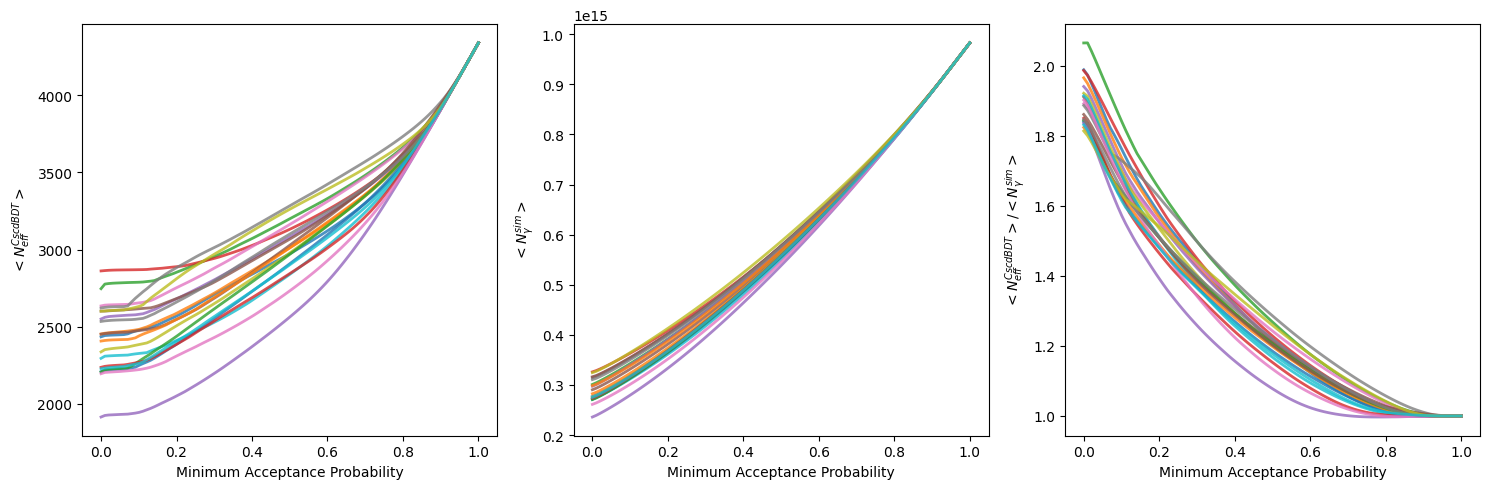

In [10]:
import importlib
importlib.reload(speedup_utils)



df['truth'] = df['CscdBDT']==1

sdfs = {}
maxes = {}
for model_name in best_models:
    res = speedup_utils.get_pred_speedup(df, 
                                pred=model_name, 
                                passed='truth', 
                                col_n_photons='n_photons', 
                                col_flux_weights='flux_weights', 
                                col_sel_weights='selection_weights'
                                )
    sdfs[model_name] = res
    maxes[model_name] = np.max(res['speed_normed'])
fig, ax = speedup_utils.make_tri_plot(nom='n_eff_passed', 
                            denom='n_photons_simulated', 
                            sdfs=sdfs,
                            legend=False,
                            )

In [17]:
print(f"{'model':<40} {'max speedup':<10} {'time per event':<10}")
for m in best_models:
    print(f"{m:<40}: {round(maxes[m], 2):<10.2f} {round(times[m]/len_df*10**6, 2):<10.2f}")

model                                    max speedup time per event
D128_M128_128_E64_64_C128_512_512       : 1.99       2.40      
D8_M128_128_E512_C256                   : 1.97       1.47      
D8_M128_128_E64_64_C1028                : 2.07       1.48      
D8_M128_128_E64_C64                     : 1.99       1.28      
D16_M128_128_E64_64_C64_256_256         : 1.94       1.44      
D32_M128_128_E64_64_C128_512_512        : 1.91       1.70      
D16_M64_64_E64_64_C256                  : 1.89       0.97      
D8_M128_128_E512_C128                   : 1.89       1.44      
D8_M64_128_E64_64_C128                  : 1.92       1.12      
D256_M128_128_E64_64_C64_64_128         : 1.91       2.54      
D32_M64_128_E64_64_C1028                : 1.84       1.40      
D2_M128_128_E64_64_C256                 : 1.82       1.32      
D8_M128_128_E256_256_C512               : 1.84       1.52      
D8_M64_128_E64_64_C64_64_128            : 1.85       1.15      
D256_M128_128_E64_64_C64_256_256    

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_3263655/1530424430.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('evaluation time per event (${\mu} s$)')
/tmp/ipykernel_3263655/1530424430.py:2: MatplotlibDeprecationWarning: Passing label as a length 20 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot([maxes[m] for m in best_models], [times[m]/len_df*10**6 for m in best_models],  'o', label=best_models)


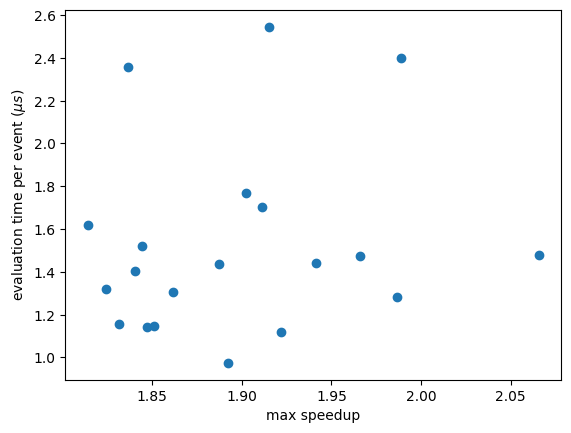

In [ ]:
len_df = len(df)
plt.plot([maxes[m] for m in best_models], [times[m]/len_df*10**6 for m in best_models],  'o')
plt.xlabel('max speedup')
plt.ylabel('evaluation time per event (${\mu} s$)')
plt.show()





In [140]:
print(f"{'model':<30} {'max speedup':<10} {'time per event':<10}")
for model_name in best_models:
    max_val = np.max(sdfs[model_name]['speed_normed'])
    print(f"{model_name:<30}: {round(max_val, 2):<10.2f} {round(times[model_name]/len_df*10**6, 2):<10.2f}")


model                          max speedup time per event
D8_M128_128_E64_C64           : 1.99       1.29      
D16_M64_64_E64_64_C256        : 1.89       0.98      
D8_M64_128_E64_64_C128        : 1.92       1.12      
D128_M128_128_E64_C64         : 1.90       1.75      
D2_M64_128_E64_C512           : 1.83       1.15      
D2_M128_128_E64_C1028         : 1.82       1.43      
D32_M128_128_E64_C256         : 1.86       1.41      
D8_M64_64_E64_C64_64_128      : 1.81       0.93      
D8_M64_128_E64_C64_256_256    : 1.77       1.19      
D8_M64_128_E64_C128           : 1.74       1.10      
D16_M64_128_E64_C256          : 1.78       1.15      
D32_M64_128_E64_C64           : 1.77       1.18      
D128_M64_128_E64_C64          : 1.78       1.55      
D128_M128_128_E64_C512        : 1.86       1.85      
D64_M128_128_E64_C1028        : 1.77       2.40      
D128_M64_128_E64_C128_512_512 : 1.79       1.86      
D2_M128_128_E64_C512          : 1.72       1.35      
D8_M64_64_E64_64_C256   

In [145]:
model_name = best_models[0]



weights, mask = speedup_utils.get_weight_from_pred(df[model_name])



[k for k in df.keys() if 'cscd' in k.lower() and 'energy' in k.lower()]

['CscdL3_CascadeLlhVertexFit_energy',
 'cscdSBU_MonopodFit4_energy',
 'cscdSBU_MonopodFit4_noDC_energy',
 'CscdL3_CascadeLlhVertexFit_log_energy',
 'cscdSBU_MonopodFit4_log_energy',
 'cscdSBU_MonopodFit4_noDC_log_energy']

## Make Cscd Energy Distriburtion

In [148]:


pred = df[model_name]
# pred = np.where(pred<0.01,0.01,pred)
# pred = np.where(pred>0.90, 1, pred)
weights, mask =  speedup_utils.get_weight_from_pred(pred)

df['accepted'] = False
df.loc[mask, 'accepted'] = True
df['acceptance_weight'] = weights

0.3394206897138241

In [31]:
import matplotlib.pyplot as plt
from tfxkit.common import base_utils as bu
from tfxkit.common import plotting_utils as pu
import plothist as ph
import numpy as np
from copy import deepcopy


## make the samples:

import speedup_utils
import numpy as np
np.random.seed(44)

# df = mf.df_test

model_name = best_models[0]
pred = df[model_name]
weights, mask =  speedup_utils.get_weight_from_pred(pred)

df['accepted'] = False
df.loc[mask, 'accepted'] = True
df['acceptance_weight'] = weights

# cpu ratio
n_photons_optimized = df.query('accepted==True')['n_photons'].sum()
n_photons_nominal = df['n_photons'].sum()
n_photons_ratio = n_photons_optimized/n_photons_nominal
print(f'{n_photons_ratio = }')

# downsampling nominal
df['pred_downsampled'] = n_photons_ratio
# nominal_downsampled_mask = np.random.random(len(df))<n_photons_ratio
_, down_mask = speedup_utils.get_weight_from_pred(df['pred_downsampled'])
# df.loc[nominal_downsampled_mask, 'nominal_downsampled'] = True
df['nominal_downsampled'] = False
df.loc[down_mask, 'nominal_downsampled'] = True


###






print(f'{n_photons_ratio = }')

plots_info = {
    'nominal': {
        'label': 'nominal', 
        'weights': ['flux_weights'], 
        'plt_kwargs': {'ls':'-', 'color':'C2'}
    },
    # 'unweighted': {
    #     'name': 'unweighted', 
    #     'label': 'after rejection (unweighted)', 
    #     'weights': ['flux_weights'], 
    #     'query': 'accepted==True',
    #     'plt_kwargs': {'ls':'--', 'color':'C1'}
    # },
    'optimized': {
        'name': 'optimized', 
        # 'label': 'after rejection (weighted)', 
        'label': 'Optimized Simulation', 
        'weights': ['flux_weights', 'acceptance_weight'],
        'query': 'accepted==True',
        'plt_kwargs': {'ls':'--', 'color':'C3'}
    },
    'nominal_downsampled': {
        'name': 'nominal_downsampled', 
        # 'label': 'nominal (downsampled)', 
        'label': 'Nominal Simulation', 
        'weights': ['flux_weights', 1.0/float(n_photons_ratio) ], 
        # 'weights': ['flux_weights' ], 
        'query': 'nominal_downsampled==True',
        'plt_kwargs': {'ls':'--', 'color':'C5'}
    },
}

vars_info = {
    'energy': dict(
        var='energy',
        # bins=np.geomspace(8E2, 1E11, 100),
        bins=np.geomspace(10E3, 1E9, 20),
        xlabel='Energy [GeV]',
        ylabel='Events',
        title='Energy',
    ),
    'cascade_energy': dict(
        var='cscdSBU_MonopodFit4_noDC_energy',
        bins=np.geomspace(10E3, 1E7, 6),
        xlabel='Reconstructed Cascade Energy [GeV]',
        ylabel='Event Rate [Hz]',
        title='ReconstructedCascade Energy',
    ),
}

var_name = 'cascade_energy'
# var_name = 'energy'


weights, mask =  speedup_utils.get_weight_from_pred(pred)



hists = {}
for plot_name, plot_info in plots_info.items():
    var_info = deepcopy(vars_info[var_name])
    if plot_info.get('query'):
        df_ = df.query(plot_info['query'])
    else:
        df_ = df
    weights = bu.combine_weight_columns(df_, plot_info['weights'])
    # pu.plot_hist(df_, weights, var_info['bins'], var_info['xlabel'], var_info['ylabel'], var_info['title'], **plot_info['plt_kwargs'])
    var = var_info.pop('var')
    hists[plot_name] = pu.make_hist(df_[var], weights=weights, bins=var_info['bins'],)



KeyError: 'D128_M128_128_E64_64_C128_512_512'

/tmp/ipykernel_3123069/2384168307.py:38: RuntimeWarning: invalid value encountered in divide
  v = variances['nominal_downsampled']/variances['nominal']


Text(0, 0.5, 'ratio of variances')

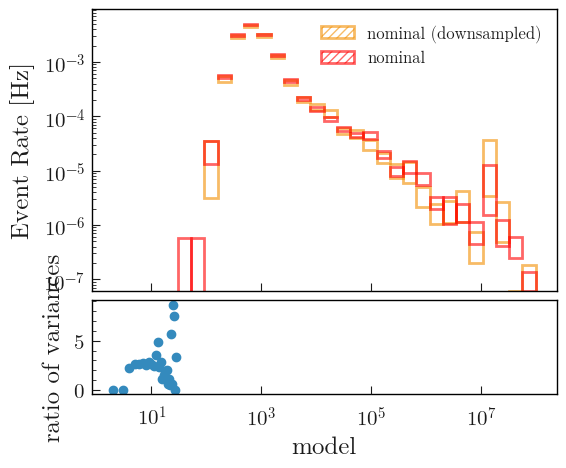

In [ ]:

# sub_plots  # pyright: ignore[reportUndefinedVariable]
fig, axs = pu.plt_subplots()
ax_main = axs[0]


colors = {  'nominal': 'red', 
            'nominal_downsampled': (242/255, 142/255, 0/255),
            'unweighted': 'C1', 
            'optimized':(0.0, 166/255, 235/255)
}
# for hname, h in hists.items():
#     if hname in ['unweighted', 'nominal']:
#         continue

variances = {}
hnames = ['nominal_downsampled', 'nominal']
for hname in hnames:
    h = hists[hname]

    plot_info = plots_info[hname]
    # plt_kwargs = plot_info['plt_kwargs']
    hlabel = plot_info['label']
    color = colors[hname]
    # ph.plot_hist(h, ax=ax, label=hlabel, histtype='step', color=color)
    ph.plot_hist_uncertainties(h, ax=ax_main, label=hlabel, color=color, fill=False, alpha=0.6, lw=2, hatch_linewidth=0, edgecolor=color, )
    variances[hname] = h.variances()
    # ph.plot_error_hist(h, ax=ax_main, label=hlabel, color=color, lw=2, marker='o', ms=2, capsize=4, alpha=0.5)
    # break

ax_main.set_xlabel(var_info['xlabel'])
ax_main.set_ylabel(var_info['ylabel'])
ax_main.set_xscale('log')
ax_main.set_yscale('log')
ax_main.legend()


ax_r = axs[1]

h1_name = hnames[0]
h2_name = hnames[1]

h1 = hists[h1_name]
v = variances[h1_name]/variances[h2_name]

ax_r.hist(v, bins=np.linspace(0, 10, 100))
ax_r.set_xlabel('model')
ax_r.set_ylabel('ratio of variances')


In [282]:
ph.get_ratio_variances

<function plothist.comparison.get_ratio_variances(h1: 'bh.Histogram', h2: 'bh.Histogram') -> 'np.ndarray'>

In [280]:
dir(h)
np.sqrt(h.variances())

array([0.00000000e+00, 0.00000000e+00, 2.87757619e-07, 2.57393871e-07,
       1.05745763e-05, 4.30282310e-05, 1.12412856e-04, 1.31850782e-04,
       1.00245743e-04, 5.53368286e-05, 2.64421630e-05, 1.50284883e-05,
       1.03708375e-05, 7.78759541e-06, 4.77228731e-06, 4.66131148e-06,
       6.14125745e-06, 2.87233773e-06, 2.02207554e-06, 2.97288159e-06,
       1.78323773e-06, 6.72164094e-07, 1.13351179e-06, 6.51573701e-07,
       3.48260958e-07, 5.61821719e-06, 4.03169794e-07, 1.80040779e-07,
       3.86924849e-08])